<a href="https://colab.research.google.com/github/abu754145/data-mining-project/blob/main/Final_Project(Data_Mining).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sal_data = pd.read_csv('/content/drive/MyDrive/Salaries.csv')

In [ ]:
sal_data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
print("Dataset shape (row, column):", sal_data.shape)
print("Total Rows:", sal_data.shape[0])
print("Total Columns:", sal_data.shape[1])

Dataset shape (row, column): (148654, 13)
Total Rows: 148654
Total Columns: 13


In [ ]:
sal_data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [ ]:
print(sal_data.isnull())

           Id  EmployeeName  JobTitle  BasePay  OvertimePay  OtherPay  \
0       False         False     False    False        False     False   
1       False         False     False    False        False     False   
2       False         False     False    False        False     False   
3       False         False     False    False        False     False   
4       False         False     False    False        False     False   
...       ...           ...       ...      ...          ...       ...   
148649  False         False     False    False        False     False   
148650  False         False     False    False        False     False   
148651  False         False     False    False        False     False   
148652  False         False     False    False        False     False   
148653  False         False     False    False        False     False   

        Benefits  TotalPay  TotalPayBenefits   Year  Notes  Agency  Status  
0           True     False             False  

In [ ]:
print(sal_data.isnull().sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64


In [ ]:
missing_percent = sal_data.isnull().mean() * 100
print(missing_percent)

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.406985
OvertimePay           0.000000
OtherPay              0.000000
Benefits             24.324270
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64


In [ ]:
sal_data['BasePay'].fillna(0, inplace=True)
sal_data['OvertimePay'].fillna(0, inplace=True)
sal_data['OtherPay'].fillna(0, inplace=True)
sal_data['Benefits'].fillna(0, inplace=True)

In [ ]:
print(sal_data.isnull().sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64


In [ ]:
sal_data.drop(['Notes', 'Status'], axis=1, inplace=True)

In [ ]:
print(sal_data.isnull().sum())

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [ ]:
print(sal_data.columns)

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')


In [ ]:
# Drop unnecessary columns
sal_data.drop(['Id', 'EmployeeName'], axis=1, inplace=True)

# Check the first few rows after dropping
print(sal_data.head())

                                         JobTitle    BasePay OvertimePay  \
0  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18         0.0   
1                 CAPTAIN III (POLICE DEPARTMENT)  155966.02   245131.88   
2                 CAPTAIN III (POLICE DEPARTMENT)  212739.13   106088.18   
3            WIRE ROPE CABLE MAINTENANCE MECHANIC    77916.0    56120.71   
4    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   134401.6      9737.0   

    OtherPay Benefits   TotalPay  TotalPayBenefits  Year         Agency  
0  400184.25        0  567595.43         567595.43  2011  San Francisco  
1  137811.38        0  538909.28         538909.28  2011  San Francisco  
2    16452.6        0  335279.91         335279.91  2011  San Francisco  
3   198306.9        0  332343.61         332343.61  2011  San Francisco  
4  182234.59        0  326373.19         326373.19  2011  San Francisco  


In [ ]:
# Check for unique values in 'JobTitle' and 'Agency'
print(sal_data['JobTitle'].unique())
print(sal_data['Agency'].unique())

['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']
['San Francisco']


In [ ]:
# Check if there are any leading/trailing spaces in 'JobTitle' or 'Agency'
sal_data['JobTitle'] = sal_data['JobTitle'].str.strip()
sal_data['Agency'] = sal_data['Agency'].str.strip()

# Check the first few rows to see the cleaned values
print(sal_data[['JobTitle', 'Agency']].head())

                                         JobTitle         Agency
0  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  San Francisco
1                 CAPTAIN III (POLICE DEPARTMENT)  San Francisco
2                 CAPTAIN III (POLICE DEPARTMENT)  San Francisco
3            WIRE ROPE CABLE MAINTENANCE MECHANIC  San Francisco
4    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  San Francisco


In [ ]:
import re

# Check for non-ASCII characters in 'JobTitle' and 'Agency'
non_ascii_jobtitle = sal_data[sal_data['JobTitle'].apply(lambda x: bool(re.search(r'[^\x00-\x7F]+', x)))]
non_ascii_agency = sal_data[sal_data['Agency'].apply(lambda x: bool(re.search(r'[^\x00-\x7F]+', x)))]

# Print rows with non-ASCII characters
print(non_ascii_jobtitle[['JobTitle']])
print(non_ascii_agency[['Agency']])

Empty DataFrame
Columns: [JobTitle]
Index: []
Empty DataFrame
Columns: [Agency]
Index: []


In [ ]:
# Replace non-numeric values with NaN in relevant columns
sal_data['BasePay'] = pd.to_numeric(sal_data['BasePay'], errors='coerce')
sal_data['OvertimePay'] = pd.to_numeric(sal_data['OvertimePay'], errors='coerce')
sal_data['OtherPay'] = pd.to_numeric(sal_data['OtherPay'], errors='coerce')
sal_data['Benefits'] = pd.to_numeric(sal_data['Benefits'], errors='coerce')
sal_data['TotalPay'] = pd.to_numeric(sal_data['TotalPay'], errors='coerce')
sal_data['TotalPayBenefits'] = pd.to_numeric(sal_data['TotalPayBenefits'], errors='coerce')

# Check for non-numeric values now
print(sal_data.isnull().sum())

JobTitle            0
BasePay             4
OvertimePay         4
OtherPay            4
Benefits            4
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [ ]:
# Fill NaN values with 0 (or use dropna() to remove rows)
sal_data.fillna(0, inplace=True)

# Re-check for missing values
print(sal_data.isnull().sum())

JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


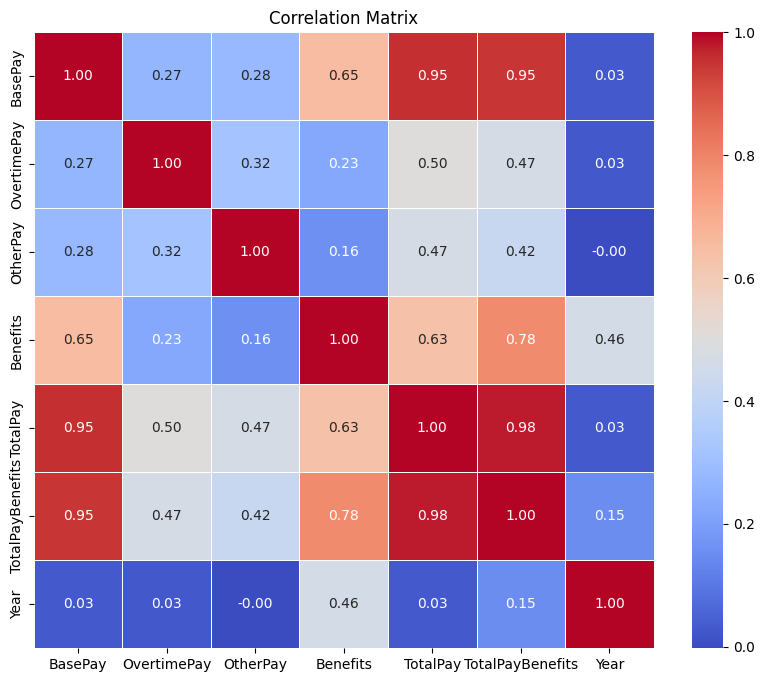

In [ ]:
# Drop non-numeric columns
sal_data_numeric = sal_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = sal_data_numeric.corr()

# Plot the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# **Linear Regression**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = sal_data_numeric.drop('TotalPay', axis=1)  # Features
y = sal_data_numeric['TotalPay']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 5.182701926993796e-21
R-squared: 1.0


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target again (if needed)
X = sal_data_numeric.drop('TotalPay', axis=1)
y = sal_data_numeric['TotalPay']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression with alpha (regularization strength)
ridge_model = Ridge(alpha=1)

# Train the model
ridge_model.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"🔵 Ridge Regression Results:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared Score: {r2_ridge}")


🔵 Ridge Regression Results:
Mean Squared Error: 5.004767629839177e-19
R-squared Score: 1.0


# **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target again (if not already defined)
X = sal_data_numeric.drop('TotalPay', axis=1)
y = sal_data_numeric['TotalPay']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression with alpha value
lasso_model = Lasso(alpha=1.0)

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("🟢 Lasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared Score: {r2_lasso}")


🟢 Lasso Regression Results:
Mean Squared Error: 0.7033919759575549
R-squared Score: 0.9999999997245586


# **ElasticNet Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target (if not already defined)
X = sal_data_numeric.drop('TotalPay', axis=1)
y = sal_data_numeric['TotalPay']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize ElasticNet Regression
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio=0.5 means equal mix of L1 and L2

# Train the model
elastic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_elastic = elastic_model.predict(X_test)

# Evaluate
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("🟣 ElasticNet Regression Results:")
print(f"Mean Squared Error: {mse_elastic}")
print(f"R-squared Score: {r2_elastic}")


🟣 ElasticNet Regression Results:
Mean Squared Error: 0.16069957824956188
R-squared Score: 0.9999999999370716


# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = sal_data_numeric.drop('TotalPay', axis=1)
y = sal_data_numeric['TotalPay']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("🌳 Decision Tree Regression Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared Score: {r2_dt}")


🌳 Decision Tree Regression Results:
Mean Squared Error: 2839664.36213644
R-squared Score: 0.9988880151001515


# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = sal_data_numeric.drop('TotalPay', axis=1)
y = sal_data_numeric['TotalPay']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Regression Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared Score: {r2_rf}")


🌲 Random Forest Regression Results:
Mean Squared Error: 1372128.521683186
R-squared Score: 0.9994626878383559


# **Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = sal_data_numeric.drop('TotalPay', axis=1)
y = sal_data_numeric['TotalPay']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("⚡ Gradient Boosting Regression Results:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared Score: {r2_gb}")


⚡ Gradient Boosting Regression Results:
Mean Squared Error: 4340691.548663867
R-squared Score: 0.9983002274771012


# **XGB Regressor**

In [ ]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define features and target
X = sal_data_numeric.drop('TotalPay', axis=1)
y = sal_data_numeric['TotalPay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("🚀 XGBoost Regression Results:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared Score: {r2_xgb}")


🚀 XGBoost Regression Results:
Mean Squared Error: 9080525.163534593
R-squared Score: 0.9964441548095676


# **SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define features and target
X = sal_data_numeric.drop('TotalPay', axis=1)
y = sal_data_numeric['TotalPay']

# Scale features (SVR is sensitive to feature scaling)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # flatten y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_scaled = svr_model.predict(X_test)

# Inverse transform the prediction and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
mse_svr = mean_squared_error(y_test_orig, y_pred)
r2_svr = r2_score(y_test_orig, y_pred)

print("📈 Support Vector Regression (SVR) Results:")
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared Score: {r2_svr}")


📈 Support Vector Regression (SVR) Results:
Mean Squared Error: 12579542.397824323
R-squared Score: 0.9950739737484816


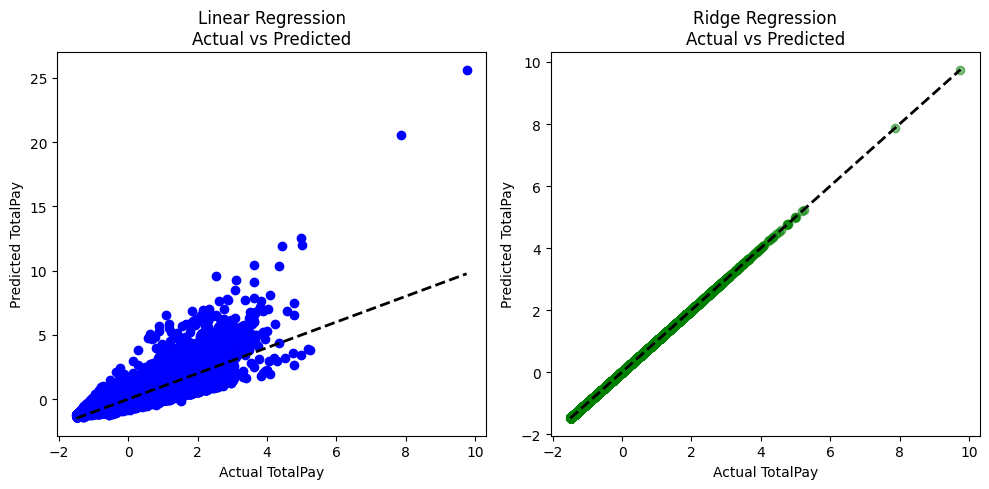

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for Linear Regression
plt.figure(figsize=(10, 5))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, model.predict(X_test), color='blue', alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual TotalPay')
plt.ylabel('Predicted TotalPay')
plt.title('Linear Regression\nActual vs Predicted')

# Ridge Regression plot
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

plt.subplot(1, 2, 2)
plt.scatter(y_test, ridge_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual TotalPay')
plt.ylabel('Predicted TotalPay')
plt.title('Ridge Regression\nActual vs Predicted')

plt.tight_layout()
plt.show()
